In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('/content/solarpowergeneration (1).csv')

In [98]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [99]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [100]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [101]:
df = df.dropna().reset_index(drop=True)

In [102]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),0
average-pressure-(period),0
power-generated,0


In [103]:
df.dtypes

,0
distance-to-solar-noon,float64
temperature,int64
wind-direction,int64
wind-speed,float64
sky-cover,int64
visibility,float64
humidity,int64
average-wind-speed-(period),float64
average-pressure-(period),float64
power-generated,int64


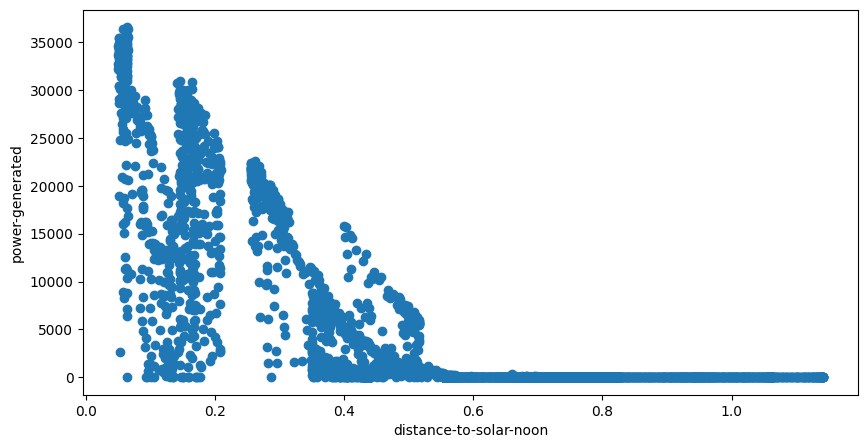

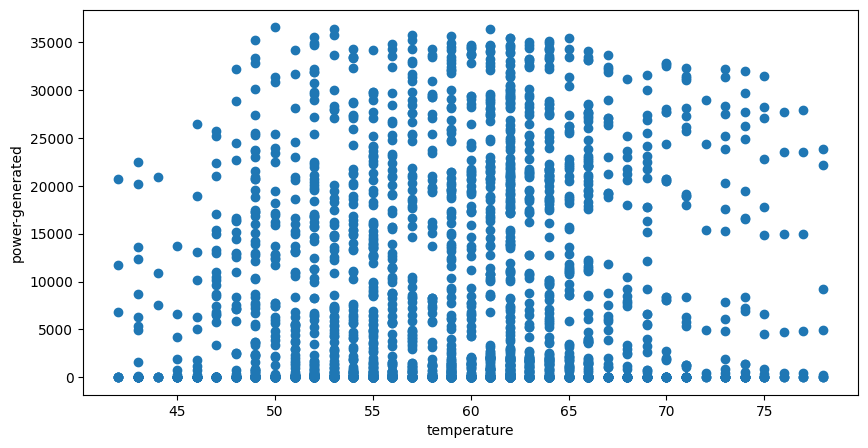

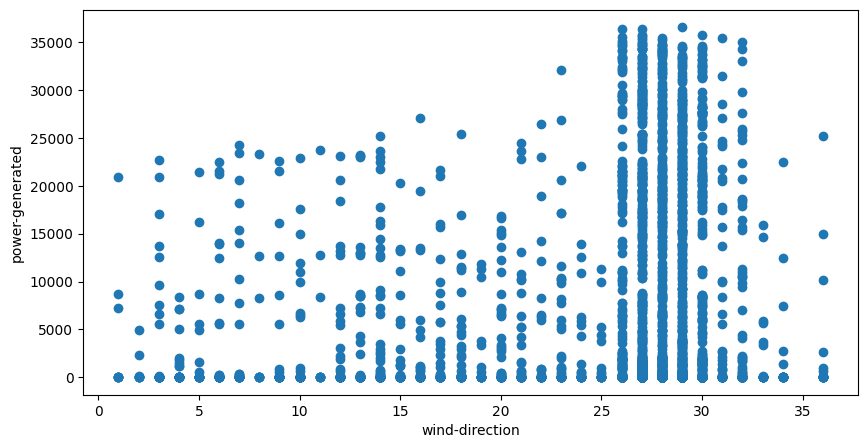

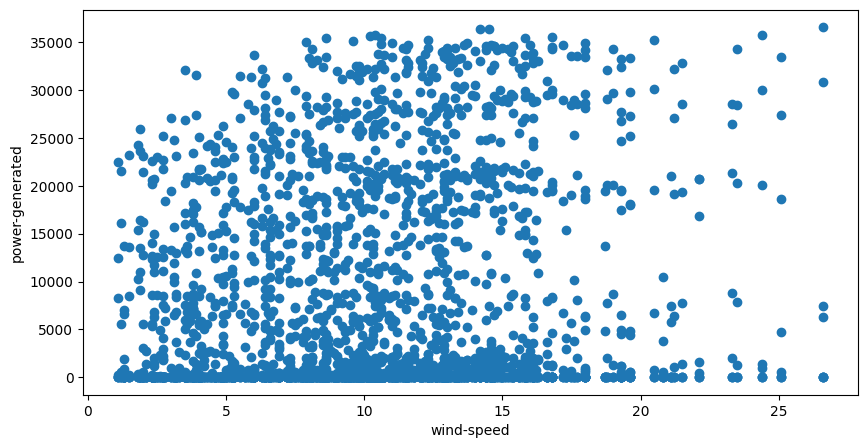

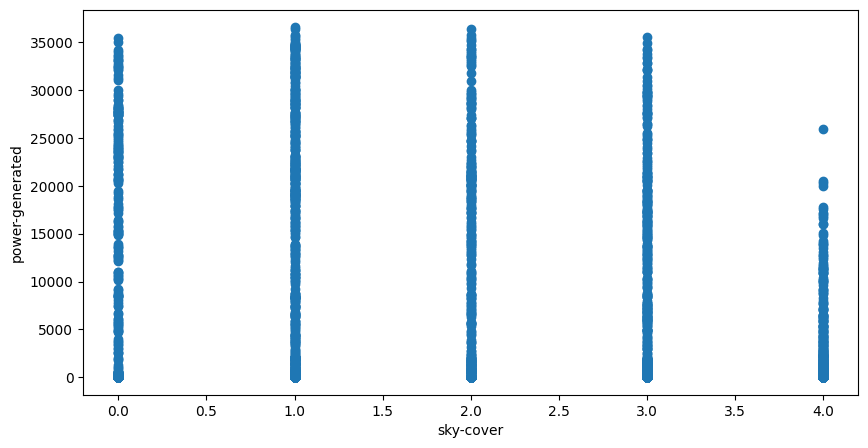

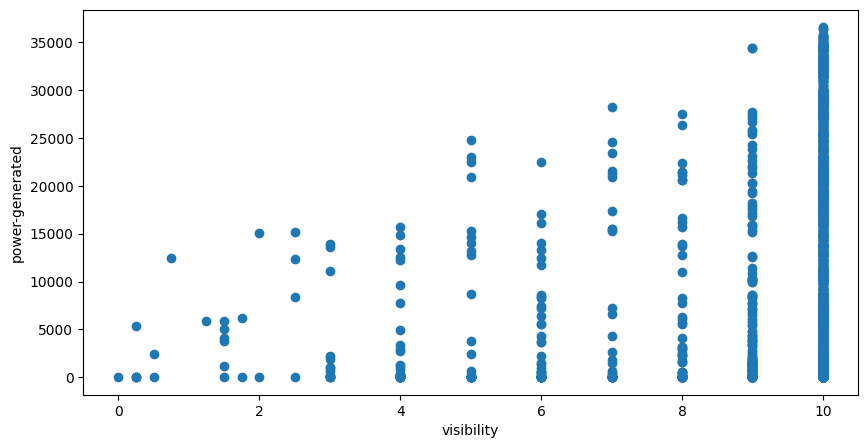

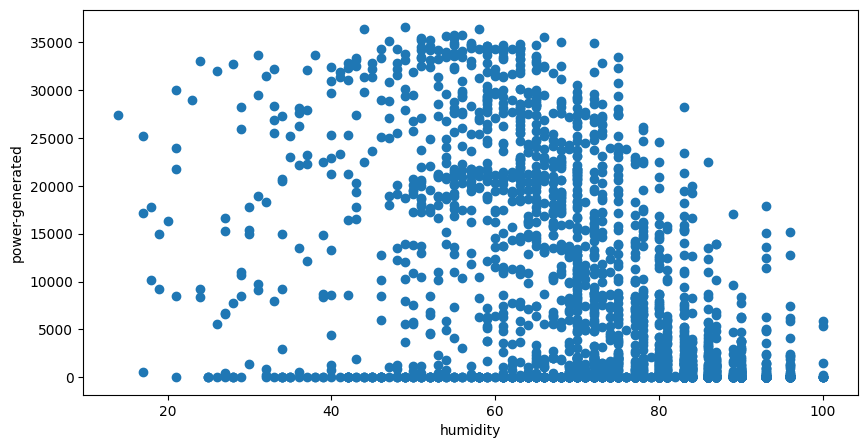

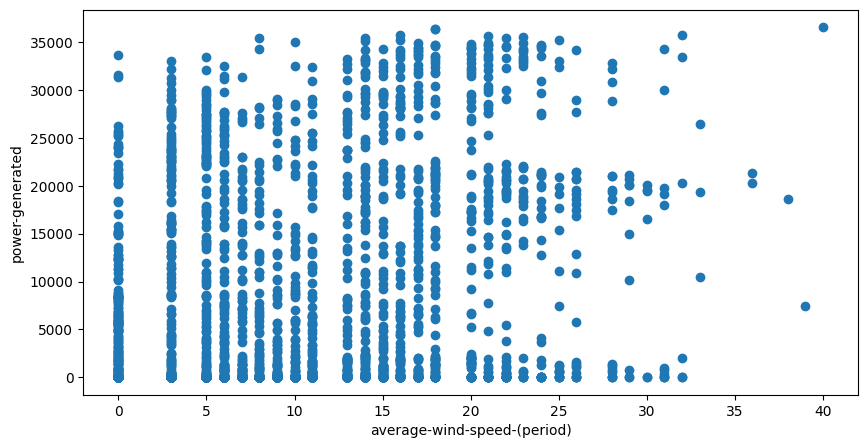

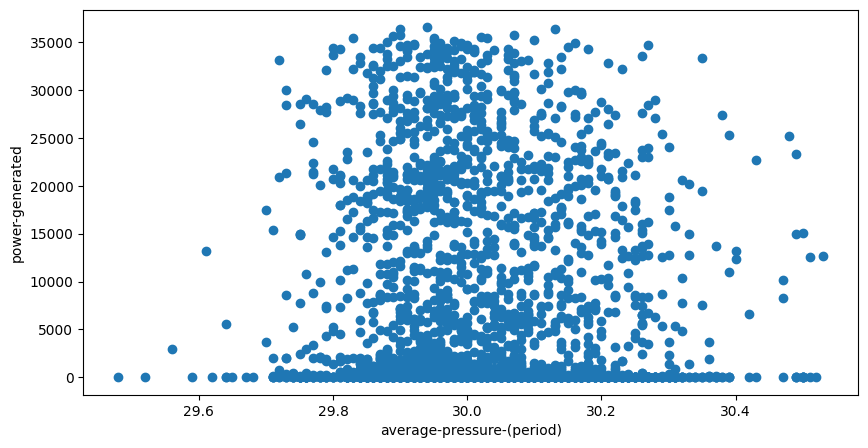

In [104]:
# relationship between the featurs and target variable
target = 'power-generated'
for i in df.columns:
  if i != target:
    plt.figure(figsize=(10,5))
    plt.scatter(x=df[i],y=df[target])
    plt.xlabel(i)
    plt.ylabel(target)
    plt.show()


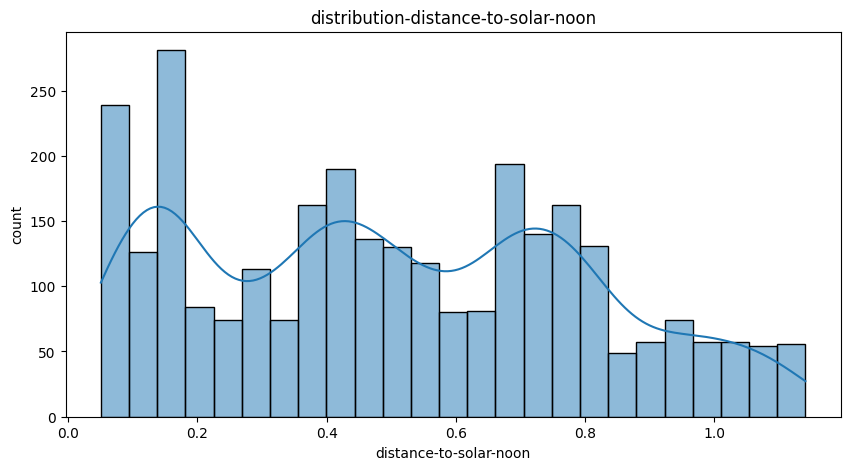

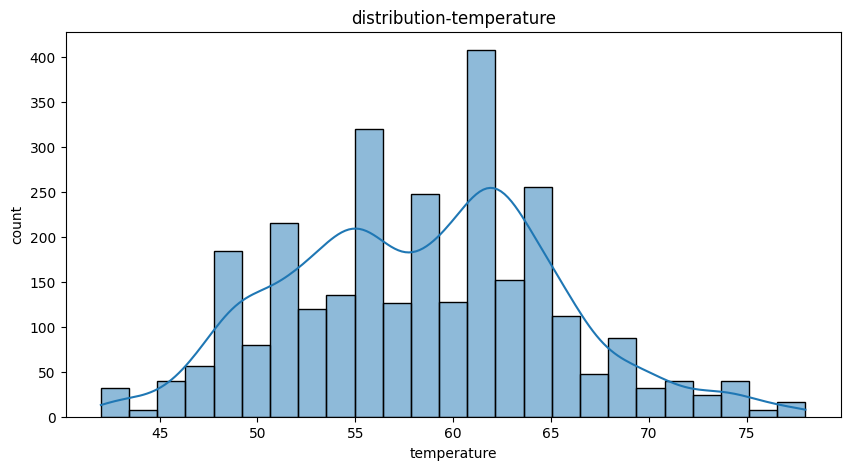

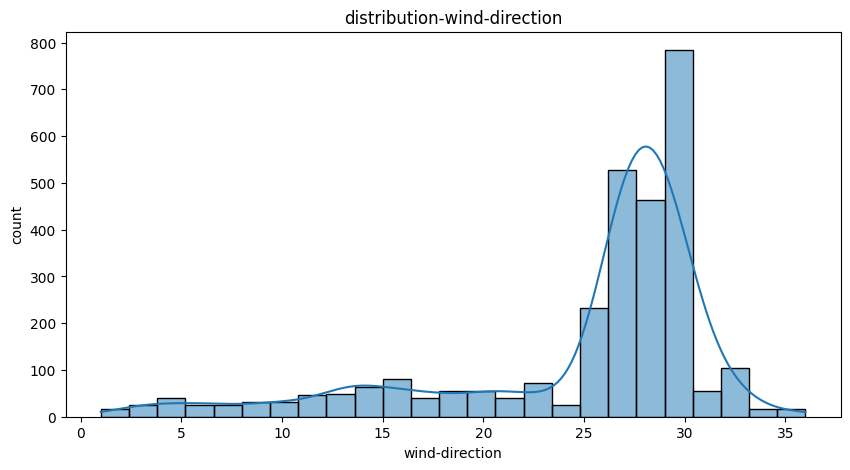

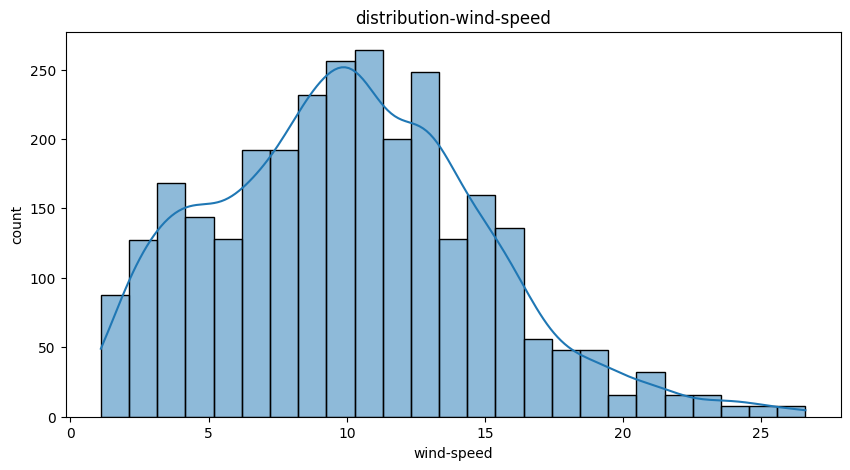

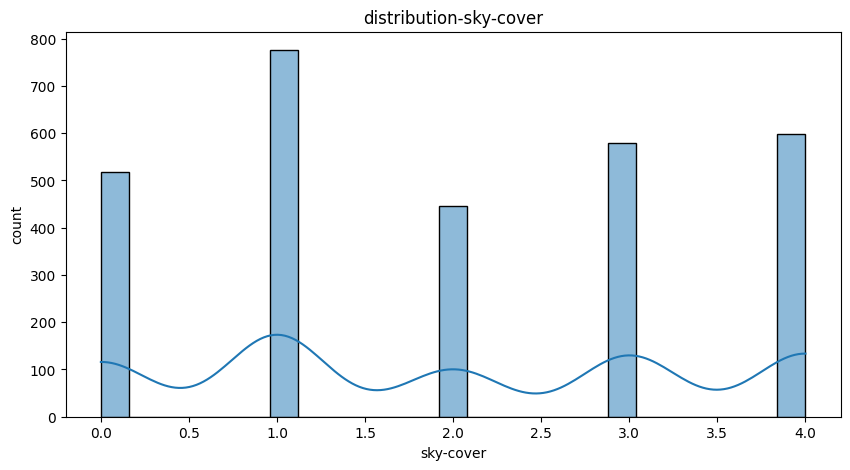

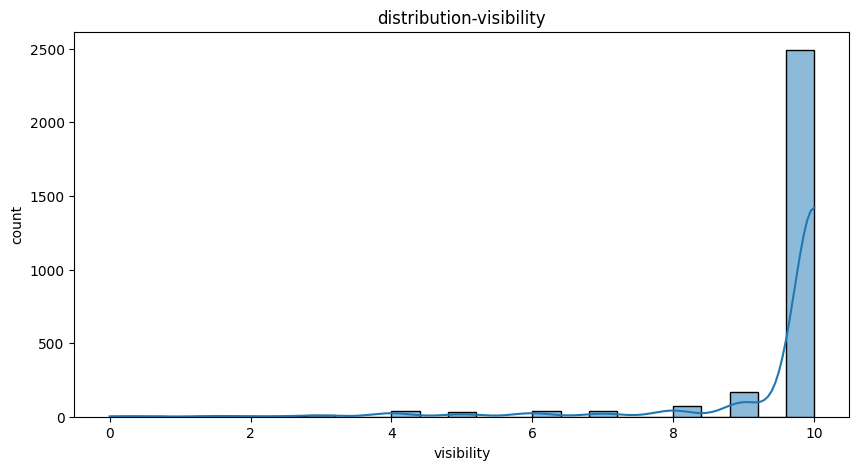

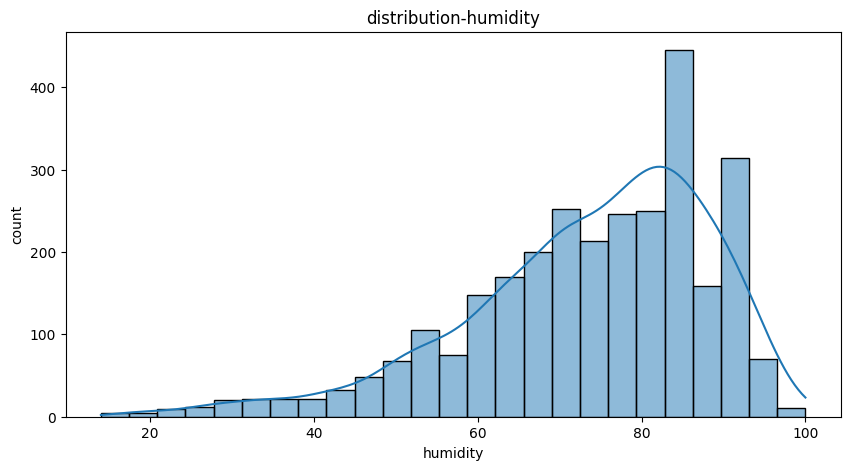

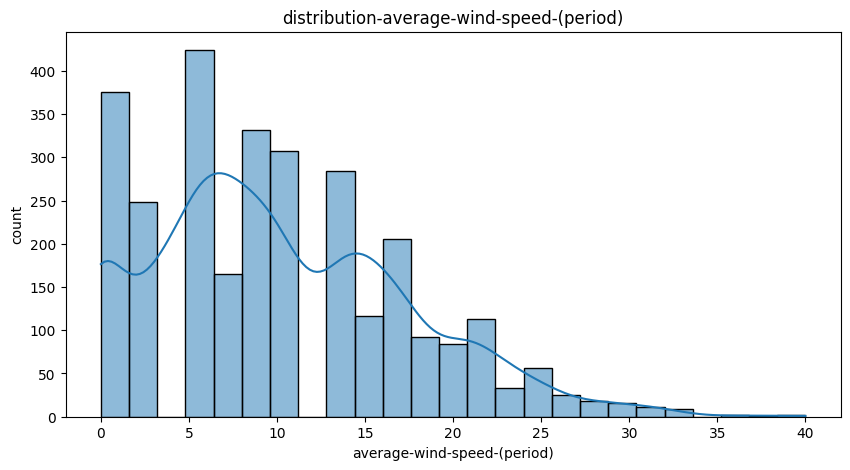

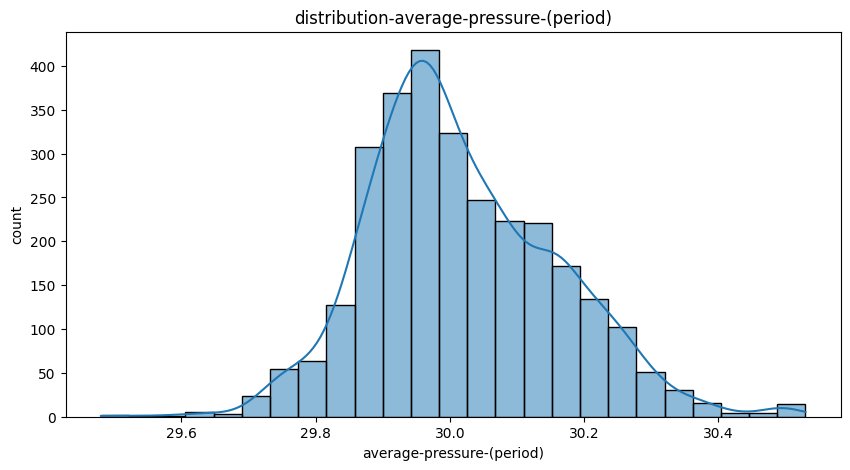

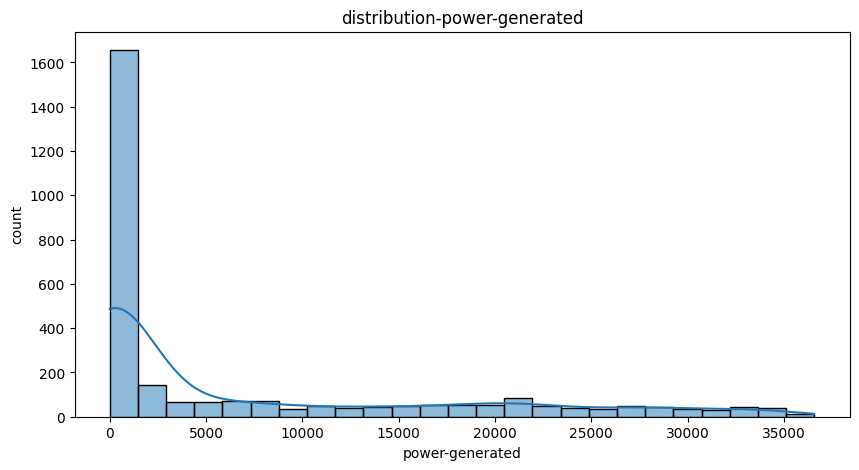

In [105]:

#hist plot tells the distribution of the features
for i in df.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df[i],bins=25, kde= True)
  plt.xlabel(i)
  plt.ylabel('count')
  plt.title(f'distribution-{i}')
  plt.show()

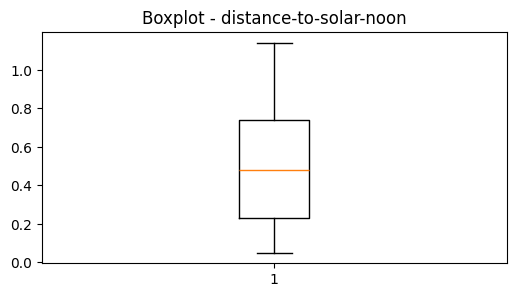

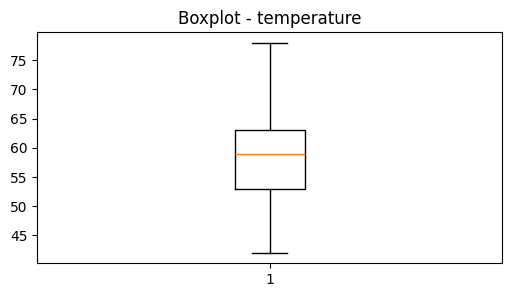

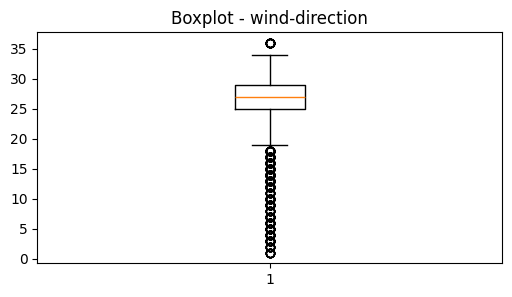

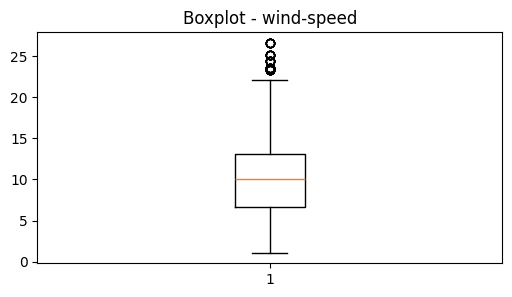

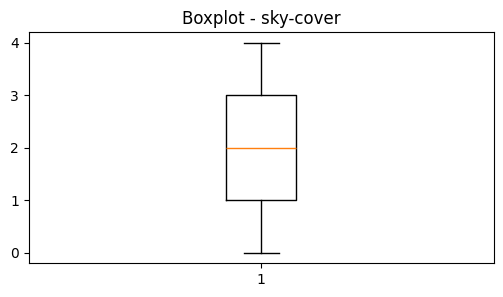

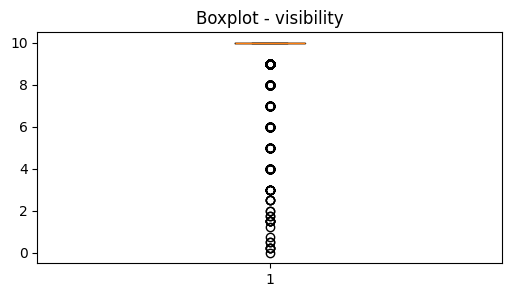

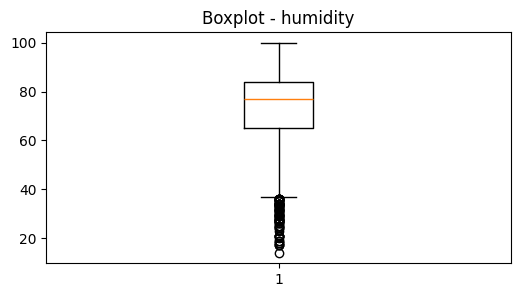

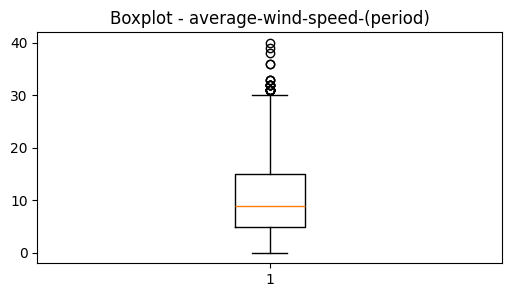

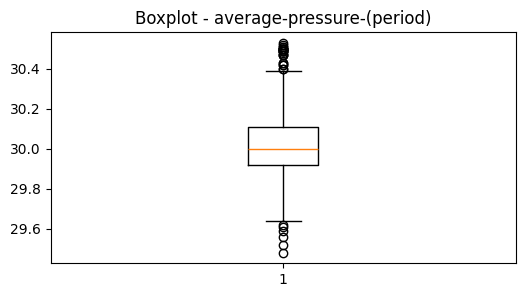

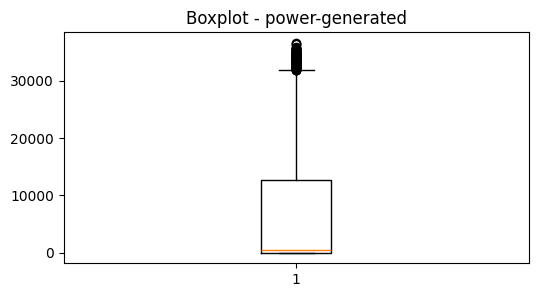

In [106]:
for i in df.columns:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[i])
    plt.title(f'Boxplot - {i}')
    plt.show()

In [107]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [108]:
df['wind-direction'] = df['wind-direction']*10

In [109]:
#feature engineering
# step 1  circular scaling sin and cos
df['wind_rad'] = np.deg2rad(df['wind-direction'])
df['wind_sin'] = np.sin(df['wind_rad'])
df['wind_cos'] = np.cos(df['wind_rad'])
df.drop(['wind-direction','wind_rad'], axis=1, inplace=True)


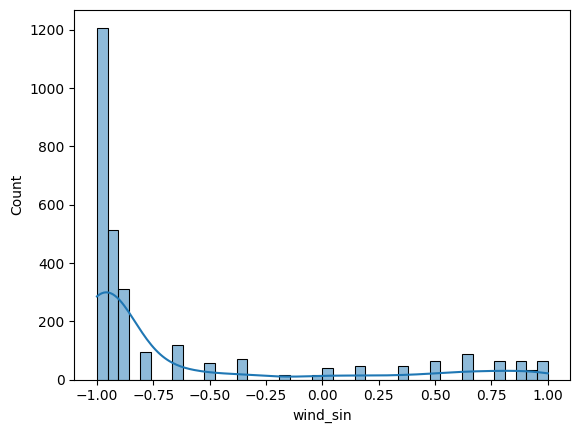

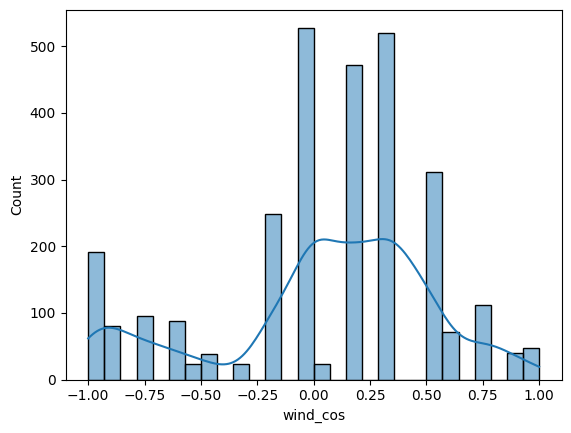

In [110]:
circular_col = ['wind_sin','wind_cos']
for i in circular_col:
  sns.histplot(df[i],kde=True)
  plt.show()

In [112]:
#before applying log
df.loc[df['average-wind-speed-(period)'] <= 0, 'average-wind-speed-(period)'] = 0.01
df['average-wind-speed-(period)_log'] = np.log1p(df['average-wind-speed-(period)'])


In [113]:
#step:2 applying log transform
log_cols = ['wind-speed','visibility','average-wind-speed-(period)']
for i in log_cols:
  df[i +'_log'] = np.log(df[i])
  df.drop(i,axis=1,inplace=True)

In [114]:
df.head()

,distance-to-solar-noon,temperature,sky-cover,humidity,average-pressure-(period),power-generated,wind_sin,wind_cos,average-wind-speed-(period)_log,wind-speed_log,visibility_log
0,0.859897,69,0,75,29.82,0,-0.984808,0.173648,2.079442,2.014903,2.302585
1,0.628535,69,0,77,29.85,0,-0.984808,0.173648,1.609438,2.014903,2.302585
2,0.397172,69,0,70,29.89,5418,-0.984808,0.173648,-4.605170,2.014903,2.302585
3,0.165810,69,0,33,29.91,25477,-0.984808,0.173648,-4.605170,2.014903,2.302585
4,0.065553,69,0,21,29.89,30069,-0.984808,0.173648,1.098612,2.014903,2.302585


In [115]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'sky-cover', 'humidity',
       'average-pressure-(period)', 'power-generated', 'wind_sin', 'wind_cos',
       'average-wind-speed-(period)_log', 'wind-speed_log', 'visibility_log'],
      dtype='object')

In [116]:
df['sky-cover'].value_counts()

,count
sky-cover,
1,776
4,598
3,580
0,518
2,447


In [117]:
df = pd.get_dummies(df, columns=['sky-cover'], drop_first=True, dtype=int)


In [118]:
df.head()

,distance-to-solar-noon,temperature,humidity,average-pressure-(period),power-generated,wind_sin,wind_cos,average-wind-speed-(period)_log,wind-speed_log,visibility_log,sky-cover_1,sky-cover_2,sky-cover_3,sky-cover_4
0,0.859897,69,75,29.82,0,-0.984808,0.173648,2.079442,2.014903,2.302585,0,0,0,0
1,0.628535,69,77,29.85,0,-0.984808,0.173648,1.609438,2.014903,2.302585,0,0,0,0
2,0.397172,69,70,29.89,5418,-0.984808,0.173648,-4.605170,2.014903,2.302585,0,0,0,0
3,0.165810,69,33,29.91,25477,-0.984808,0.173648,-4.605170,2.014903,2.302585,0,0,0,0
4,0.065553,69,21,29.89,30069,-0.984808,0.173648,1.098612,2.014903,2.302585,0,0,0,0


In [120]:
scale_cols = ['temperature','humidity','average-pressure-(period)','wind-speed_log','visibility_log','average-wind-speed-(period)_log']
df[scale_cols].replace([np.inf, -np.inf], np.nan, inplace=True)
df[scale_cols].isna().sum()


,0
temperature,0
humidity,0
average-pressure-(period),0
wind-speed_log,0
visibility_log,0
average-wind-speed-(period)_log,0


In [122]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isna().sum()


,0
distance-to-solar-noon,0
temperature,0
humidity,0
average-pressure-(period),0
power-generated,0
wind_sin,0
wind_cos,0
average-wind-speed-(period)_log,0
wind-speed_log,0
visibility_log,1


In [123]:
df = df.dropna(subset=['visibility_log'])


In [124]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isna().sum()


,0
distance-to-solar-noon,0
temperature,0
humidity,0
average-pressure-(period),0
power-generated,0
wind_sin,0
wind_cos,0
average-wind-speed-(period)_log,0
wind-speed_log,0
visibility_log,0


In [126]:
#standardscaler
from sklearn.preprocessing import StandardScaler
scale_cols = ['temperature','wind_sin','wind_sin','humidity','average-pressure-(period)','wind-speed_log','visibility_log','average-wind-speed-(period)_log']
scaler =StandardScaler()
df[scale_cols]=scaler.fit_transform(df[scale_cols])


In [133]:
#applying log on target variable
df['power-generated_log'] = np.log1p(df['power-generated'])
df.drop('power-generated', axis=1, inplace=True)



In [147]:
scaled_cols1 =['wind_sin','wind_cos']
scaler = StandardScaler()
df[scaled_cols1] = scaler.fit_transform(df[scaled_cols1])

In [148]:
df.head()

,distance-to-solar-noon,temperature,humidity,average-pressure-(period),wind_sin,wind_cos,average-wind-speed-(period)_log,wind-speed_log,visibility_log,sky-cover_1,sky-cover_2,sky-cover_3,sky-cover_4,power-generated_log
0,0.859897,1.538993,0.099767,-1.392232,-0.582093,0.247232,0.287082,-0.257939,0.25139,0,0,0,0,0.000000
1,0.628535,1.538993,0.232516,-1.180913,-0.582093,0.247232,0.088892,-0.257939,0.25139,0,0,0,0,0.000000
2,0.397172,1.538993,-0.232107,-0.899155,-0.582093,0.247232,-2.531663,-0.257939,0.25139,0,0,0,0,8.597667
3,0.165810,1.538993,-2.687969,-0.758276,-0.582093,0.247232,-2.531663,-0.257939,0.25139,0,0,0,0,10.145571
4,0.065553,1.538993,-3.484465,-0.899155,-0.582093,0.247232,-0.126511,-0.257939,0.25139,0,0,0,0,10.311283


In [149]:
#spliting the data
from sklearn.model_selection import train_test_split
y = df['power-generated_log']
x = df.drop(['power-generated_log'], axis=1)


In [150]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [152]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [153]:
y_pred_log = model.predict(x_test)

In [154]:
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

In [155]:
rmse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

In [156]:
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 314600042.58222544
MAE: 6890.315037697591
R²: -1.840587782837813


In [157]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

In [158]:
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

In [160]:
rmse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

In [161]:
print("Polynomial Regression Results")
print("RMSE :", rmse)
print("MAE  :", mae)
print("R²   :", r2)

Polynomial Regression Results
RMSE : 314600042.58222544
MAE  : 6890.315037697591
R²   : -1.840587782837813
